# Теория вероятностей и математическая статистика

## Урок 8

## Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

### Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в данных, в которых целевая переменная является _количественной_, а факторы являются _категориальными_.

В __однофакторном дисперсионном анализе__ исследуется влияние одного категориального фактора $x$ на переменную $y$. Допустим, у фактора $x$ имеется $k$ разных значений или __уровней__. На практике это означает, что у нас имеется $k$ выборок:
$$Y_1, \dots, Y_k,$$
и выборка $Y_i$ соответствует значениям переменной $y$ на $i$-м уровне фактора $x$.

Итак, нулевая гипотеза $H_0$ утверждает, что средние по всем этим выборкам равны:
$$H_0: \:\: \overline{Y_1} = \dots = \overline{Y_k}$$

Другими словами, нулевая гипотеза заключается в том, что фактор $x$ никак не влияет на значения переменной $y$.

Для проверки гипотез в дисперсионном анализе используется __F-критерий Фишера__. Используемая статистика представляет из себя отношение дисперсии между уровнями к дисперсии внутри уровней.

Пусть в каждой выборке $Y_i$ содержится $n_i$ элементов. Обозначим через $Y$ объединение всех выборок, т.е. выборку размера $n = n_1 + \dots + n_k$.

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки.

Первая сумма — отклонения между группами («b» от слова Between — между), вторая — отклонения внутри групп («w» от слова Within — внутри).

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{x, \: k_1, k_2}$ — квантиль порядка $x$ для распределения Фишера с параметрами $k_1$, $k_2$.

__Пример 1__

Среди людей, проживающих в одном городе, выделены три группы по профессии: бухгалтеры, юристы, программисты. Имеются данные по зарплатам в этих трёх группах:
```
y1 = [70, 50, 65, 60, 75]
y2 = [80, 75, 90, 70, 75, 65, 85, 100]
y3 = [130, 100, 140, 150, 160, 170, 200]
```
Требуется проверить гипотезу у равенстве средней зарплаты по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [ ]:
import numpy as np

In [ ]:
y1 = np.array([70, 50, 65, 60, 75])
y2 = np.array([80, 75, 90, 70, 75, 65, 85, 100])
y3 = np.array([130, 100, 140, 150, 160, 170, 200])

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

n1, n2, n3

(5, 8, 7)

Выборочные средние по каждой группе:

In [ ]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(64.0, 80.0, 150.0)

Видно, что средние зарплаты разнятся. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [ ]:
y = np.concatenate([y1, y2, y3])

print(y)

[ 70  50  65  60  75  80  75  90  70  75  65  85 100 130 100 140 150 160
 170 200]


In [ ]:
y_mean = y.mean()
y_mean

100.5

Найдём значения $SS_b$ и $SS_w$:

In [ ]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(27175.0, 7270.0)

Запишем оценки дисперсий:

In [ ]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(13587.5, 427.6470588235294)

Итак, значение статистики $F$:

In [ ]:
F = sigma2_b / sigma2_w
F

31.77269601100413

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём нужный нам квантиль:

In [ ]:
from scipy import stats

In [ ]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.5915305684750827

Итак, наша критическая область имеет вид:
$$\Omega_\alpha = \left( 3.59, \infty \right)$$

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

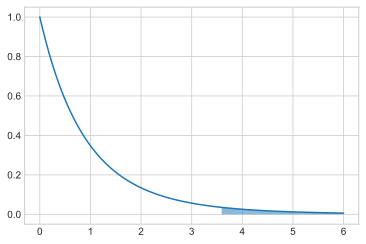

In [ ]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Значение статистики попало в критическую область, поэтому заключаем, что отличие средних зарплат действительно является статистически значимым.

В `scipy` имеется готовая реализация однофакторного дисперсионного анализа: в функцию `scipy.stats.f_oneway` нужно поочерёдно передать каждую из выборок для теста. Возвращает такая функция, как обычно, значение статистики и P-значение.

In [ ]:
stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=31.77269601100413, pvalue=1.8091304567650962e-06)

__Двухфакторный дисперсионный анализ__

Существует также процедура __двухфакторного дисперсионного анализа__ для случая, когда имеется пара категориальных факторов, и требуется исследовать влияние каждого из них на целевую переменную.

Про двухфакторный дисперсионный анализ читайте в дополнительных материалах к уроку.

### Метод главных компонент

__Метод главных компонент__ — один из методов анализа факторов и понижения их размерности, т.е. приведения множества непосредственно наблюдаемых факторов $x_i$, $i = 1, \dots, m$, к меньшему числу новых линейно независимых факторов $y_j$, $j = 1, \dots, q$, $q < m$.

С помощью этого метода можно:
* Проанализировать уровень совокупной линейной зависимости в имеющихся данных (а не только лишь попарной, как в корреляционном анализе).
* Понизить размерность в данных и одновременно избавиться от линейной зависимости, контролируя при этом уровень потери информации.

В основе метода главных компонент лежит работа с _собственными векторами_ и _собственными числами_ матрицы ковариаций. В дополнительных материалах к уроку представлен краткий экскурс в эту тематику.

В контексте метода главных компонент нас интересует следующее: для матрицы ковариаций собственные векторы являются __главными направлениями вариативности в данных__ (или __главными компонентами__).

Причём чем больше собственное значение, тем сильнее степень вариативности данных в этом направлении.

Итак,
1. метод главных компонент __перераспределяет__ вариативность внутри факторов $x_1$, ..., $x_m$ вдоль главных компонент,
2. при этом главные компоненты с малым уровнем вариативности (т.е. с малыми собственными значениями) можно исключить.

Допустим, имеется матрица объект-признак: $X = \left( x_{ij} \right)_{n \times m}$ (т.е. $n$ объектов, $m$ признаков). Предположим также, что в процессе преобразования данных мы готовы потерять не более, чем долю $p$ от имеющейся информации (например, это может быть ограничение в $5 \%$).

__Этапы метода главных компонент__:

1. _Центрируем_ матрицу $X$, т.е. вычтем из каждого столбца среднее по этому столбцу. В результате получится матрица $X^\ast = \left( x_{ij}^\ast \right)_{n \times m}$, в которой средние по столбцам равны $0$. Обозначим сумму дисперсий признаков за $\sigma_X$, она нам ещё пригодится.
2. Вычислим матрицу ковариаций $\Sigma = \left( \sigma_{ij} \right)_{m \times m}$.
3. Вычислим собственные векторы и собственные значения матрицы $\Sigma$. Пусть это собственные значения $\lambda_1, \dots, \lambda_m,$ расположенные в порядке убывания, и им соответствуют векторы $v_1, \dots, v_m.$ Сумма собственных значений равна $\sigma_X$. Собственные векторы $v_i$ называются __главными компонентами__, и уровень вариативности данных вдоль каждой компоненты равен $\lambda_i$.
4. Найдём наименьшее $k$, для которого верно:
$$\dfrac{\lambda_1 + \dots + \lambda_k}{\sigma_X} \geq 1 - p$$
Значение слева называется __долей объяснённой дисперсии__ выбранных главных компонент: в знаменателе стоит дисперсия признаков до применения метода, а в числителе стоит то, что будет дисперсией новых признаков.
5. Составим матрицу $T$ из первых $k$ собственных векторов (столбцов). Тогда новая матрица объект-признак: $Y = X^\ast \cdot T$.

__Пример 2__

Рассмотрим матрицу объект признак:

In [ ]:
samples = np.array([[ 2.36499331, -0.57978654],
                    [ 5.70144948,  3.54257542],
                    [ 5.27028536,  2.1560189 ],
                    [ 4.14275078,  0.39188923],
                    [ 3.93109011,  0.87195848],
                    [ 4.59408573,  2.17496773],
                    [ 3.53666882,  0.84484304],
                    [ 5.13601245,  2.74557671],
                    [ 4.40989037,  1.7030094 ],
                    [ 5.05796456,  1.86949263]])

Поскольку признаков всего $2$, соответствующие объекты можно расположить на плоскости:

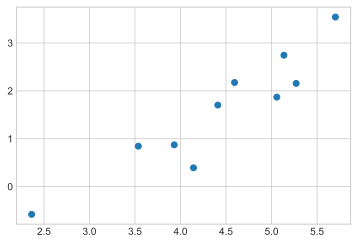

In [ ]:
plt.scatter(samples[:, 0], samples[:, 1])

Как мы видим, объекты более-менее лежат на одной прямой, поэтому применение метода главных компонент здесь может быть вполне эффективным.

Итак, сперва центрируем наши данные. Чтобы посчитать любую статистику двумерного массива вдоль конкретной оси, можно использовать аргумент `axis`. Например, посчитать среднее по столбцам можно следующим образом:

In [ ]:
samples.mean(axis=0, keepdims=True)

array([[4.4145191, 1.5720545]])

In [ ]:
samples_centered = samples - samples.mean(axis=0)

print(samples_centered)

[[-2.04952579 -2.15184104]
 [ 1.28693038  1.97052092]
 [ 0.85576626  0.5839644 ]
 [-0.27176832 -1.18016527]
 [-0.48342899 -0.70009602]
 [ 0.17956663  0.60291323]
 [-0.87785028 -0.72721146]
 [ 0.72149335  1.17352221]
 [-0.00462873  0.1309549 ]
 [ 0.64344546  0.29743813]]


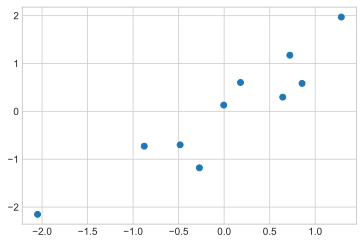

In [ ]:
plt.scatter(samples_centered[:, 0], samples_centered[:, 1])

Теперь посчитаем матрицу ковариаций. Отметим, что если функция `numpy.cov` получает на вход двумерный массив, а не несколько одномерных массивов, то ожидается, что значения каждого признака будут расположены в строках (а не в столбцах, как у нас). Поэтому в эту функцию мы подаём транспонированную матрицу `samples_centered.T`.

In [ ]:
cov = np.cov(samples_centered.T, ddof=1)

print(cov)

[[0.95934497 1.09880063]
 [1.09880063 1.45693615]]


Собственные значения и собственные векторы можно получить с помощью функции `numpy.linalg.eig`.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(f'eigenvalues:\n{eigenvalues}\n')
print(f'eivenvectors:\n{eigenvectors}')

eigenvalues:
[0.08152525 2.33475587]

eivenvectors:
[[-0.78129206 -0.62416562]
 [ 0.62416562 -0.78129206]]


Проверим, что сумма собственных значений действительно равна $\sigma_X$:

In [ ]:
sigma_x = samples.var(axis=0, ddof=1).sum()
sigma_x

2.416281116587471

In [ ]:
eigenvalues.sum()

2.416281116587471

_Замечание_. Для дальнейших шагов важно, чтобы собственные значения шли именно в порядке убывания. Однако, просто отсортировать их по убыванию мало, ведь собственные векторы находятся в соответствии с собственными значениями и должны идти в том же порядке.

Отсортировать два массива в одном порядке можно с помощью функции `numpy.argsort`, которая возвращает индексы массива в том порядке, в котором расположились бы элементы массива при сортировке по возрастанию:

In [ ]:
ids = eigenvalues.argsort()[::-1]  # поскольку нам нужен порядок убывания

eigenvalues = eigenvalues[ids]
eigenvectors = eigenvectors[:, ids]

print(f'eigenvalues:\n{eigenvalues}\n')
print(f'eivenvectors:\n{eigenvectors}')

eigenvalues:
[2.33475587 0.08152525]

eivenvectors:
[[-0.62416562 -0.78129206]
 [-0.78129206  0.62416562]]


Чтобы посмотреть, какую долю объяснённой дисперсии можно получить при каждом выборке $k$, воспользуемся функцией `numpy.cumsum`, которая считает кумулятивную сумму значений массива:
$$[a_1, a_1 + a_2, a_1 + a_2 + a_3, \dots]$$

In [ ]:
(eigenvalues / sigma_x).cumsum()

array([0.96626003, 1.        ])

Видим, что если использовать только первую главную компоненту, удастся сохранить около $96 \%$ информации. Это очень неплохо.

Итак, нужно взять первый собственный вектор (столбец) и умножить на него центрированную матрицу $X^\ast$:

In [ ]:
samples_centered

array([[-2.04952579, -2.15184104],
       [ 1.28693038,  1.97052092],
       [ 0.85576626,  0.5839644 ],
       [-0.27176832, -1.18016527],
       [-0.48342899, -0.70009602],
       [ 0.17956663,  0.60291323],
       [-0.87785028, -0.72721146],
       [ 0.72149335,  1.17352221],
       [-0.00462873,  0.1309549 ],
       [ 0.64344546,  0.29743813]])

In [ ]:
T = eigenvectors[:, [0]]
T

array([[-0.62416562],
       [-0.78129206]])

In [ ]:
new_samples = samples_centered.dot(T)

print(new_samples)

[[ 2.96045985]
 [-2.34281004]
 [-0.99038663]
 [ 1.09168219]
 [ 0.84871921]
 [-0.58313064]
 [ 1.1160885 ]
 [-1.36719493]
 [-0.09942493]
 [-0.63400259]]


In [ ]:
new_samples.var(ddof=1)

2.3347558703559046

In [ ]:
new_samples.var(ddof=1) / sigma_x

0.966260032546749

Готовая реализация метода главных компонент имеется в `sklearn`:

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(samples)

Главные компоненты:

In [ ]:
pca.components_.T

array([[-0.62416562,  0.78129206],
       [-0.78129206, -0.62416562]])

In [ ]:
eigenvectors

array([[-0.62416562, -0.78129206],
       [-0.78129206,  0.62416562]])

_Замечание_. Выше мы транспонировали матрицу компонент `pca.components_`, поскольку в реализации `sklearn` главные компоненты записаны в строках.

Доля объяснённой дисперсии каждой компоненты:

In [ ]:
pca.explained_variance_ratio_

array([0.96626003, 0.03373997])

С помощью метода `.transform` происходит трансформация старых признаков в новые.

In [ ]:
pca.transform(samples)

array([[ 2.96045985, -0.25817302],
       [-2.34281004, -0.22446293],
       [-0.99038663,  0.30411288],
       [ 1.09168219,  0.52428816],
       [ 0.84871921,  0.05927664],
       [-0.58313064, -0.23602373],
       [ 1.1160885 , -0.23195706],
       [-1.36719493, -0.16877519],
       [-0.09942493, -0.08535393],
       [-0.63400259,  0.31706817]])

Новые признаки идут в порядке убывания их дисперсии. Таким образом, если нужно оставить только одну главную компоненту, следует оставить из новых признаков только один.

In [ ]:
pca.transform(samples)[:, [0]]

array([[ 2.96045985],
       [-2.34281004],
       [-0.99038663],
       [ 1.09168219],
       [ 0.84871921],
       [-0.58313064],
       [ 1.1160885 ],
       [-1.36719493],
       [-0.09942493],
       [-0.63400259]])

In [ ]:
new_samples

array([[ 2.96045985],
       [-2.34281004],
       [-0.99038663],
       [ 1.09168219],
       [ 0.84871921],
       [-0.58313064],
       [ 1.1160885 ],
       [-1.36719493],
       [-0.09942493],
       [-0.63400259]])

### Логистическая регрессия

Логистическая регрессия возникает в задачах __бинарной классификации__: исследуется некоторый набор объектов, и каждому объекту приписана бинарная метка ($0$ или $1$).

В модели __логистической регрессии__ вероятность объекта $x = (x_1, \dots, x_m)$ принадлежать классу $1$ моделируется следующим образом:
$$P(y = 1 | x) = \sigma(b_0  + b_1 x_1 + \dots + b_m x_m),$$
где $\sigma(z)$ — __логистическая функция__ или __сигмоида__:
$$\sigma(z) = \dfrac{1}{1 + e^{-z}}$$
Сигмоида принимает в качестве аргумента вещественное число, а отдаёт число из промежутка $[0, 1]$.

_Замечание_. Как и ранее в линейной регрессии, мы вводим дополнительный нулевой фактор $x_0$, равный $1$ для каждого объекта, который нужен просто чтобы записать выражение в векторном виде:
$$P \left( y = 1 | x \right) = \sigma(x \cdot b),$$
где $b = (b_0, b_1, \dots, b_m)$ — вектор коэффициентов модели.

Для оптимизации параметров модели используется __метод максимального правдоподобия__. Его схему можно изобразить следующим образом:
$$\displaystyle\prod_{i = 1}^n P(y = y_i | x = x_i) \rightarrow \displaystyle\max_b$$
По сути мы подбираем набор параметров так, чтобы _максимизировать вероятность наблюдать ту выборку, которая у нас есть_.

Тут кроме формулы для $P(y = 1 | x)$ нам понадобится также формула вероятности принадлежности объекта к нулевому классу:
$$P(y = 0 | x) = 1 - \sigma(x \cdot b)$$

Отсюда запишем общую вероятность:
$$P(y | x) = \sigma(x \cdot b)^y \cdot \left( 1 - \sigma(x \cdot b) \right)^{1 - y}$$

Такие вероятности и используются в методе максимального правдоподобия.

В практическом смысле удобнее оптимизировать не саму функцию, а её логарифм (поскольку в этом случае множители превращаются в слагаемые). Кроме того, традиционно оптимизационные задачи записываются именно как задачи _минимизации_, поэтому добавим перед всем выражением минус.

Итак, __минимизируется функционал__:
$$Q(b) = - \displaystyle\sum_{i = 1}^n \Big[ y_i \cdot \ln \big( \sigma(x_i \cdot b) \big) + (1 - y_i) \cdot \ln \big( 1 - \sigma(x_i \cdot b) \big) \Big],$$
где $x_i$ — набор признаков $i$-го объекта, $y_i$ — его метка ($0$ или $1$). Такой функционал называют __бинарной кросс-энтропией__.

Для нахождения оптимального решения используют оптимизационные методы, например, __градиентный спуск__. 

Здесь нам понадобится вектор __градиента__, который состоит из частных производных функционала $Q(b)$ по переменным $b_j$:

$$\nabla Q = \left( \dfrac{\partial Q}{\partial b_0}, \dots, \dfrac{\partial Q}{\partial b_m} \right)$$
Результат взятия каждой частной производной вычисляется по формуле:
$$\dfrac{\partial Q}{\partial b_j} = \displaystyle\sum_{i=1}^n \big( \sigma(b_0 x_{i0} + \dots + b_m x_{im}) - y_i \big) x_{ij},$$
где $x_{ij}$ — $j$-й признак $i$-го объекта из выборки.

Вектор градиента указывает направление __наискорейшего роста__.

Непосредственно метод градиентного спуска заключается в следующем. Сначала выбираются начальные значения параметров $b_0, \dots, b_m$, т.е. вектор $b^{[0]}$. Затем итеративно повторяется вычисление:
$$b^{[k + 1]} = b^{[k]} - \lambda_k \nabla Q \left( b^{[k]} \right)$$

Иначе говоря, на каждой итерации мы делаем шаг размера $\lambda_k$ против направления вектора градиента.

__Почему против?__ Потому что вектор градиента указывает направление наискорейшего роста, следовательно, обратное направление является направлением _наискорейшего убывания_.

Описанный выше процесс повторяется, пока соседние векторы $b^{[k + 1]}$, $b^{[k]}$ не перестанут сильно отличаться друг от друга.

Результат оптимизации очень сильно зависит от выбора начальных коэффициентов $b^{[0]}$, а также параметров $\lambda_k$, отвечающих за скорость спуска. 

Малые значения $\lambda_k$ приводят к низкой скорости спуска, тогда как высокие значения $\lambda_k$ могут привести к расхождению метода.

Выбор этих значений — важная задача в теории оптимизации.

In [ ]:
def sigmoid(x: float) -> float:
    """Сигмоида.
    """
    
    return 1 / (1 + np.exp(-x))

In [ ]:
def partial_derivative(j: int, b: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """Частная производная функционала Q по переменной b_j.
    """
    
    return sum(
        x[i, j] * (sigmoid(b.dot(x[i])) - y[i])
        for i in range(x.shape[0])
    )

In [ ]:
def gradient(b: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Вектор градиента.
    """
    
    return np.array([
        partial_derivative(j, b, x, y)
        for j in range(b.shape[0])
    ])

In [ ]:
def gradient_descent_step(
        lambda_: float,
        b: np.ndarray,
        x: np.ndarray,
        y: np.ndarray,
) -> np.ndarray:
    """Один шаг градиентного спуска.
    """
    
    return b - lambda_ * gradient(b, x, y)

__Пример 3__

Рассмотрим массив `samples` из примера 2.

[[ 2.36499331 -0.57978654]
 [ 5.70144948  3.54257542]
 [ 5.27028536  2.1560189 ]
 [ 4.14275078  0.39188923]
 [ 3.93109011  0.87195848]
 [ 4.59408573  2.17496773]
 [ 3.53666882  0.84484304]
 [ 5.13601245  2.74557671]
 [ 4.40989037  1.7030094 ]
 [ 5.05796456  1.86949263]]


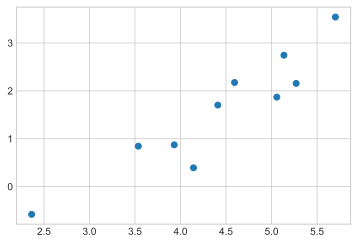

In [ ]:
print(samples)

plt.scatter(samples[:, 0], samples[:, 1])

Рассмотрим набор меток к этим объектам:

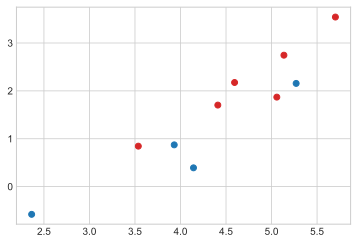

In [ ]:
y = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

color = {0: 'C0', 1: 'C3'}
color = [color[i] for i in y]

plt.scatter(samples[:, 0], samples[:, 1], color=color)

Построим для данной задачи модель логистической регрессии методом градиентного спуска.

Для начала отмасштабируем наши данные, чтобы значения каждого признака попадали в интервал $[0, 1]$. Это немного упростит процесс оптимизации.

In [ ]:
samples = (samples - samples.min(axis=0)) / (samples.max(axis=0) - samples.min(axis=0))

samples

array([[0.        , 0.        ],
       [1.        , 1.        ],
       [0.87077183, 0.66364998],
       [0.53282806, 0.2357085 ],
       [0.46938929, 0.3521634 ],
       [0.66810181, 0.66824658],
       [0.35117366, 0.34558576],
       [0.83052766, 0.80666455],
       [0.61289493, 0.55375922],
       [0.80713521, 0.59414462]])

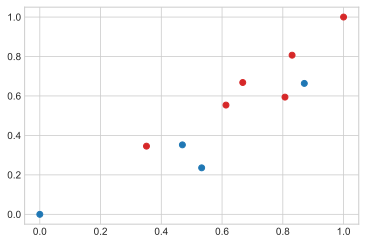

In [ ]:
plt.scatter(samples[:, 0], samples[:, 1], color=color)

Добавим столбец «фиктивного» фактора:

In [ ]:
ones = np.ones((samples.shape[0], 1))

x = np.hstack([ones, samples])

x

array([[1.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.87077183, 0.66364998],
       [1.        , 0.53282806, 0.2357085 ],
       [1.        , 0.46938929, 0.3521634 ],
       [1.        , 0.66810181, 0.66824658],
       [1.        , 0.35117366, 0.34558576],
       [1.        , 0.83052766, 0.80666455],
       [1.        , 0.61289493, 0.55375922],
       [1.        , 0.80713521, 0.59414462]])

Нам понадобится метрика чтобы вычислять расстояние между соседними векторами параметров. Будем использовать евклидово расстояние.

In [ ]:
from scipy.spatial.distance import euclidean

Начальное приближение $b^{[0]}$ можно выбирать нулевым или произвольным. Будем также использовать коэффициент $\lambda_k = \dfrac{0.1}{k}$.

In [ ]:
from tqdm import trange

In [ ]:
b_0 = np.zeros(x.shape[1])

b = b_0

for k in trange(1, 10 ** 6):
    lambda_ = 0.1 / k
    
    b_new = gradient_descent_step(lambda_, b, x, y)
        
    if euclidean(b, b_new) < 10 ** (-5):
        print(f'success on step {k}\n')
        
        break
    
    b = b_new

b = b_new

print(b)

  1%|          | 6135/999999 [00:02<06:00, 2760.34it/s]

success on step 6136

[-0.03670051  0.41548189  0.65301927]


Для сравнения также построим модель логистической регрессии из библиотеки `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', fit_intercept=False)

model.fit(x, y)
b_sklearn = model.coef_.flatten()

print(f'Коэффициенты: {b_sklearn}')
print(f'Число итераций: {model.n_iter_}')

Коэффициенты: [-0.09047654  0.35720772  0.61585617]
Число итераций: [3]


Видим, что коэффициенты достаточно близки, но модели из `sklearn` понадобилось ощутимо меньше итераций.

__Оценка модели логистической регрессии__

Для оценки качества моделей бинарной классификации используют __confusion matrix__, или __матрицу ошибок__:
$$M = \left( \begin{array}{cc} TP & FP \\ FN & TN \end{array} \right),$$
где:
* $TP$ — _true positive_, т.е. число объектов, верно причисленных к классу $1$,
* $FP$ — _false positive_, число ошибок первого рода, т.е. объектов, ложно причисленных к классу $1$,
* $FN$ — _false negative_, ошибки второго рода,
* $TN$ — _true negative_, число объектов, верно причисленных к классу $0$.

Например, построим матрицу ошибок для построенной нами модели. Будем считать, что модель относит объект к классу $1$, если полученная моделью вероятность больше $0.5$.

In [ ]:
z = sigmoid(x.dot(b))
z

array([0.4908259 , 0.73726484, 0.68102051, 0.58385091, 0.5958714 ,
       0.66312724, 0.58294627, 0.69743985, 0.64096654, 0.66521849])

In [ ]:
z_ = (z > 0.5).astype(int)
z_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
TP = ((y == 1) & (z_ == 1)).sum()
FP = ((y == 0) & (z_ == 1)).sum()
FN = ((y == 1) & (z_ == 0)).sum()
TN = ((y == 0) & (z_ == 0)).sum()

TP, FP, FN, TN

(6, 3, 0, 1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
confusion_matrix(y, z_)

array([[1, 3],
       [0, 6]])

На основании матрицы ошибок можно получить многие известные метрики качества:
$$accuracy = \dfrac{TP + TN}{TP + FP + FN + TN}$$

$$precision = \dfrac{TP}{TP + FP}, \:\: recall = \dfrac{TP}{TP + FN}$$

In [ ]:
accuracy = (TP + TN) / (TP + FP + FN + TN)
accuracy

0.7

In [ ]:
accuracy_score(y, z_)

0.7

In [ ]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(0.6666666666666666, 1.0)

In [ ]:
precision_score(y, z_), recall_score(y, z_)

(0.6666666666666666, 1.0)

То же для модели из `sklearn`:

In [ ]:
z_sklearn = model.predict(x)
z_sklearn

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y, z_sklearn)

0.7

In [ ]:
precision_score(y, z_sklearn), recall_score(y, z_sklearn)

(0.6666666666666666, 1.0)